## Fashion MNIST Dataset

In [2]:
!pip install torch torchvision --upgrade


    100% |████████████████████████████████| 519.5MB 26kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x58dea000 @  0x7f838e7a81c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 21.3MB/s 
    100% |████████████████████████████████| 2.0MB 3.9MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [72]:
import numpy as np
import torch
from matplotlib import pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['axes.labelsize'] = 24

%load_ext autoreload
%autoreload 2

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [0]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [29]:
(X_train, X_valid) = X_train[5000:], X_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

w, h = 28, 28
X_train = X_train.reshape(X_train.shape[0], w, h, 1)
X_valid = X_valid.reshape(X_valid.shape[0], w, h, 1)
X_test = X_test.reshape(X_test.shape[0], w, h, 1)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print("x_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print(X_train.shape[0], 'train set')
print(X_valid.shape[0], 'validation set')
print(X_test.shape[0], 'test set')

x_train shape: (50000, 28, 28, 1) y_train shape: (50000, 10)
50000 train set
5000 validation set
10000 test set


## Initialising

In [64]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Training

In [66]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5.new', verbose = 1, save_best_only=True)
history = model.fit(X_train,
         y_train,
         batch_size=64,
         epochs=15,
         validation_data=(X_valid, y_valid),
         callbacks=[checkpointer])

Train on 50000 samples, validate on 5000 samples
Epoch 1/15
49984/50000 [============================>.] - ETA: 0s - loss: 0.6267 - acc: 0.7695
Epoch 00001: val_loss improved from inf to 0.40868, saving model to model.weights.best.hdf5.new
50000/50000 [==============================] - 74s 1ms/step - loss: 0.6265 - acc: 0.7695 - val_loss: 0.4087 - val_acc: 0.8490
Epoch 2/15
49984/50000 [============================>.] - ETA: 0s - loss: 0.4268 - acc: 0.8458
Epoch 00002: val_loss improved from 0.40868 to 0.34215, saving model to model.weights.best.hdf5.new
50000/50000 [==============================] - 73s 1ms/step - loss: 0.4268 - acc: 0.8457 - val_loss: 0.3422 - val_acc: 0.8752
Epoch 3/15
49984/50000 [============================>.] - ETA: 0s - loss: 0.3842 - acc: 0.8600
Epoch 00003: val_loss improved from 0.34215 to 0.30506, saving model to model.weights.best.hdf5.new
50000/50000 [==============================] - 74s 1ms/step - loss: 0.3842 - acc: 0.8600 - val_loss: 0.3051 - val_acc:

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


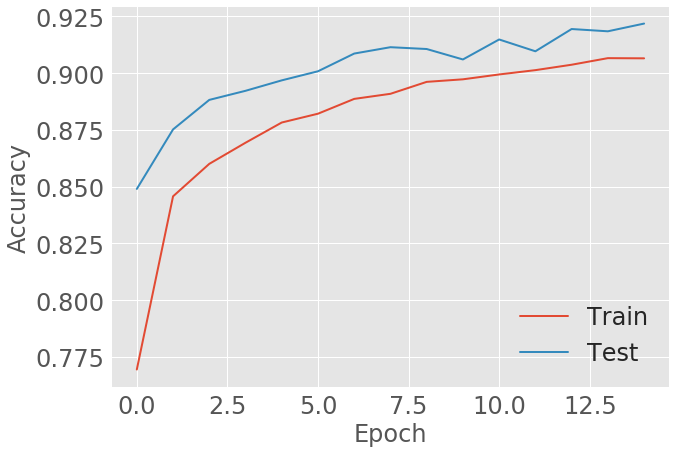

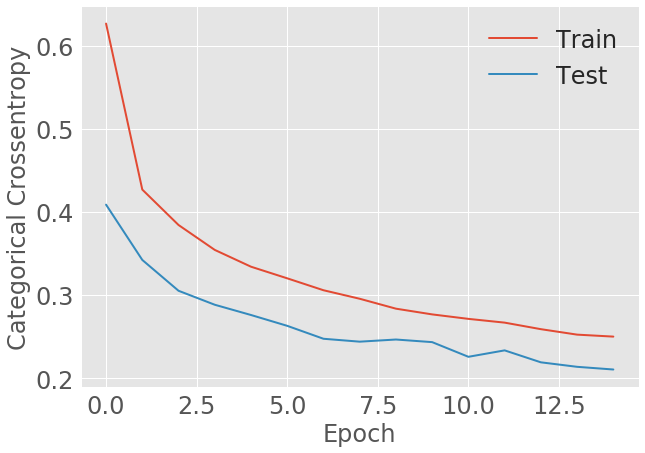

In [73]:
plt.figure(figsize=(10,7))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()


plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [0]:
model.load_weights('model.weights.best.hdf5')

In [74]:
# Evaluate the model on test set
score = model.evaluate(X_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9124


## Check loss for different train sizes

In [77]:
set_sizes = [1000, 2000, 5000, 10000, 20000, 50000]
accuracy_metric = []

for size in set_sizes:
    print(size)
    used_indices = np.random.choice(np.arange(X_train.shape[0]), size, replace=False)
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
   
    model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
    
    history = model.fit(X_train[used_indices, :], y_train[used_indices, :],
                    batch_size=64,
                    epochs=8,
                    validation_data=(X_valid, y_valid))
    accuracy_metric.append(model.evaluate(X_test,y_test, verbose=1))
    print(accuracy_metric[-1])

1000
Train on 1000 samples, validate on 5000 samples
Epoch 1/8
1000/1000 [==============================] - 3s 3ms/step - loss: 1.8767 - acc: 0.3680 - val_loss: 1.3096 - val_acc: 0.5394
Epoch 2/8
1000/1000 [==============================] - 3s 3ms/step - loss: 1.2025 - acc: 0.5340 - val_loss: 0.9917 - val_acc: 0.6254
Epoch 3/8
1000/1000 [==============================] - 3s 3ms/step - loss: 0.9814 - acc: 0.6270 - val_loss: 0.8611 - val_acc: 0.6716
Epoch 4/8
1000/1000 [==============================] - 3s 3ms/step - loss: 0.8631 - acc: 0.6920 - val_loss: 0.7552 - val_acc: 0.7274
Epoch 5/8
1000/1000 [==============================] - 3s 3ms/step - loss: 0.7628 - acc: 0.7130 - val_loss: 0.7411 - val_acc: 0.7194
Epoch 6/8
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6886 - acc: 0.7560 - val_loss: 0.6736 - val_acc: 0.7392
Epoch 7/8
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6353 - acc: 0.7650 - val_loss: 0.6374 - val_acc: 0.7568
Epoch 8/8
10000/

ValueError: ignored

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


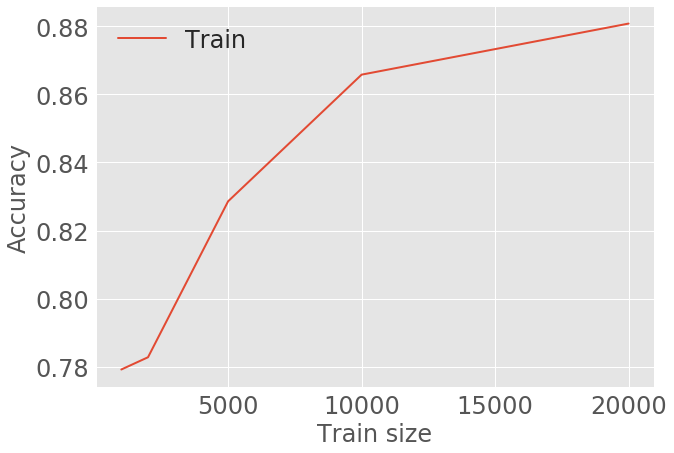

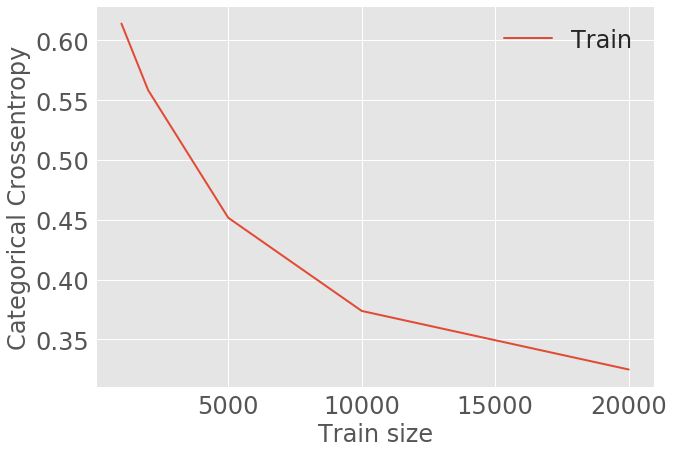

In [91]:
accuracy_loss = np.asarray(accuracy_metric)

plt.figure(figsize=(10,7))
plt.plot(set_sizes[:-1], accuracy_loss[:, 1])
plt.ylabel('Accuracy')
plt.xlabel('Train size')
plt.legend(['Train'], loc='best')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10,7))
plt.plot(set_sizes[:-1], accuracy_loss[:, 0])
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Train size')
plt.legend(['Train'], loc='best')
plt.show()

In [0]:
def X_noize(X_train, mean, var):
    n_imgs = X_train.shape[0]
    n_chan = X_train.shape[1]
    n_rows = X_train.shape[2]
    n_cols = X_train.shape[3]
    if var == 0:
        noise = np.zeros((n_imgs, n_chan, n_rows, n_cols))
    else:
        noise = np.random.normal(mean, var/255., 
                                     (n_imgs, n_chan, n_rows, n_cols))
    noisy_X = X_train + noise
    noisy_X = np.clip(noisy_X, 0., 1.)
    return noisy_X

In [87]:
noises = [x for x in range(0, 40, 5)]
histories = []

for noise in noises:
    print(noise)
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
   
    model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
    
    histories.append(model.fit(X_noize(X_train[:10000], mean=0, var=noise), y_train[:10000],
                    batch_size=64,
                    epochs=8,
                    validation_data=(X_valid, y_valid)))
    

0
Train on 10000 samples, validate on 5000 samples
Epoch 1/8
10000/10000 [==============================] - 16s 2ms/step - loss: 0.9754 - acc: 0.6389 - val_loss: 0.5852 - val_acc: 0.7768
Epoch 2/8
10000/10000 [==============================] - 15s 2ms/step - loss: 0.5895 - acc: 0.7804 - val_loss: 0.4855 - val_acc: 0.8222
Epoch 3/8
10000/10000 [==============================] - 15s 2ms/step - loss: 0.5172 - acc: 0.8077 - val_loss: 0.4439 - val_acc: 0.8414
Epoch 4/8
10000/10000 [==============================] - 15s 2ms/step - loss: 0.4738 - acc: 0.8206 - val_loss: 0.4111 - val_acc: 0.8494
Epoch 5/8
10000/10000 [==============================] - 16s 2ms/step - loss: 0.4420 - acc: 0.8366 - val_loss: 0.3984 - val_acc: 0.8524
Epoch 6/8
10000/10000 [==============================] - 16s 2ms/step - loss: 0.4192 - acc: 0.8458 - val_loss: 0.3813 - val_acc: 0.8580
Epoch 7/8
10000/10000 [==============================] - 15s 2ms/step - loss: 0.4007 - acc: 0.8501 - val_loss: 0.3601 - val_acc: 0.86

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


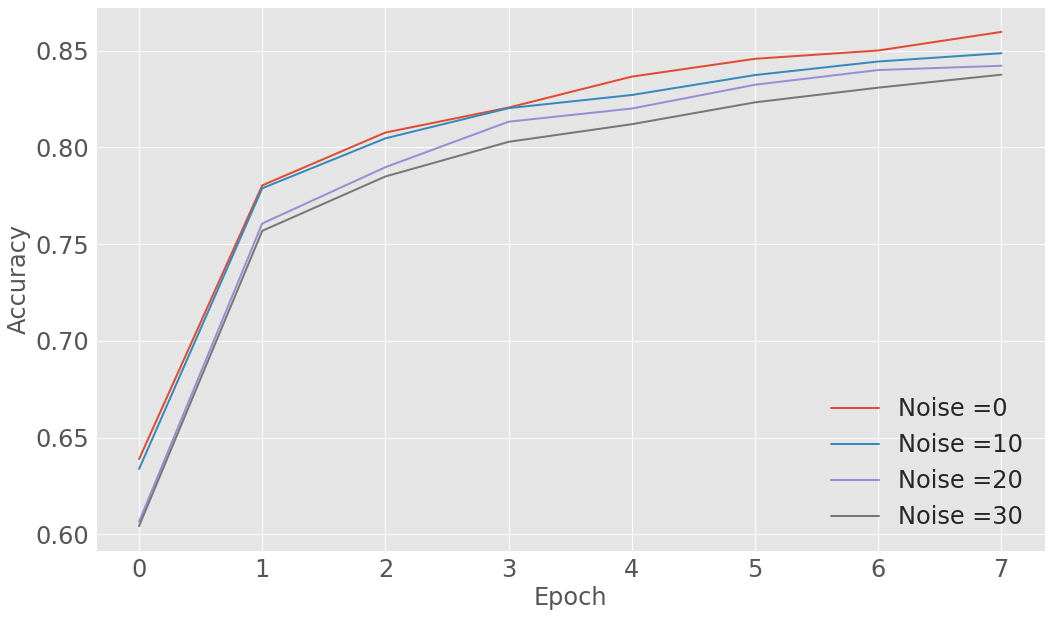

In [90]:
plt.figure(figsize=(17, 10))
i = 0
for history in histories:  
    plt.plot(history.history['acc'], label="Noise =" + str(noises[i]))
    i+= 1
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()